In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
def display(img, cmap='gray'):
    fig = plt.figure(figsize=(12,10))
    ax = fig.add_subplot(111)
    ax.imshow(img, cmap='gray')

In [3]:
reeses = cv2.imread('C://Users/anu52/Downloads/Computer-Vision-with-Python/Computer-Vision-with-Python/DATA/reeses_puffs.png',0)

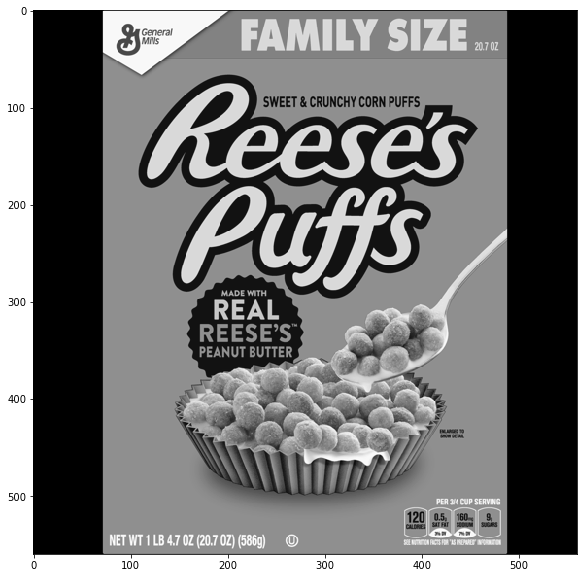

In [4]:
display(reeses)

In [5]:
cereals = cv2.imread('C://Users/anu52/Downloads/Computer-Vision-with-Python/Computer-Vision-with-Python/DATA/many_cereals.jpg',0)

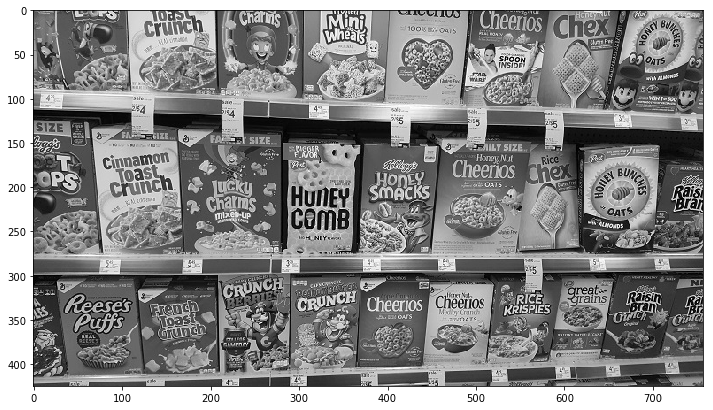

In [6]:
display(cereals)

### ORB Method

In [7]:
orb = cv2.ORB_create()

In [8]:
kp1, des1 = orb.detectAndCompute(reeses,None)
kp2, des2 = orb.detectAndCompute(cereals,None)

In [9]:
bf = cv2.BFMatcher(cv2.NORM_HAMMING, crossCheck=True)

In [10]:
matches = bf.match(des1, des2)

In [11]:
matches = sorted(matches, key=lambda x:x.distance)

In [12]:
reeses_matches = cv2.drawMatches(reeses, kp1, cereals, kp2, matches[:25], None, flags=2)

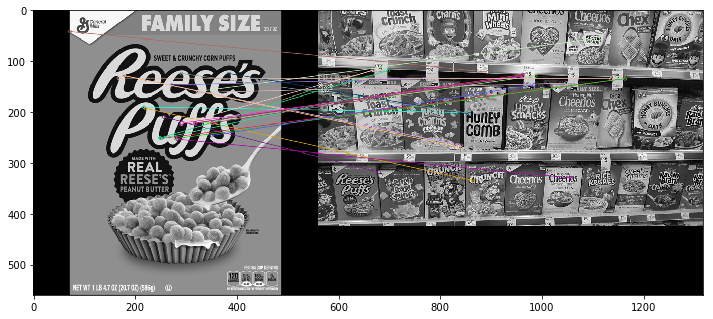

In [13]:
display(reeses_matches)

### SIFT Method

In [14]:
sift = cv2.xfeatures2d.SIFT_create()

In [15]:
kp1, des1 = sift.detectAndCompute(reeses, None)
kp2, des2 = sift.detectAndCompute(cereals, None)

In [16]:
bf = cv2.BFMatcher()

In [17]:
matches = bf.knnMatch(des1, des2, k=2)

In [19]:
good = []

# Ratio mactch1 < 75% match2
# Less distance == Better match
for match1, match2 in matches:
    if match1.distance < 0.75*match2.distance:
        good.append([match1])

In [20]:
len(good)

78

In [21]:
len(matches)

1500

In [26]:
sift_matches = cv2.drawMatchesKnn(reeses, kp1, cereals, kp2, good, None, flags=2)

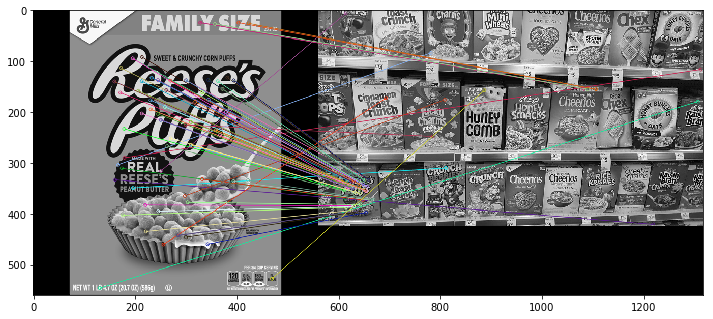

In [27]:
display(sift_matches)

### FLANN Method

In [36]:
sift = cv2.xfeatures2d.SIFT_create()

In [37]:
kp1, des1 = sift.detectAndCompute(reeses, None)
kp2, des2 = sift.detectAndCompute(cereals, None)

In [38]:
# FLANN - (Fast Library for Approximate Nearest Neighbors)
FLANN_INDEX_KDTREE = 0
index_params = dict(algorithm = FLANN_INDEX_KDTREE, trees=5)
search_params = dict(checks=50)

In [39]:
flann = cv2.FlannBasedMatcher(index_params, search_params)

In [40]:
matches = flann.knnMatch(des1, des2, k=2)

In [41]:
matchesMask = [[0,0] for i in range(len(matches))]

In [42]:
# good = []

for i,(match1,match2) in enumerate(matches):
    if match1.distance < 0.75*match2.distance:
        matchesMask[i] = [1,0]
#         good.append([match1])

In [43]:
draw_params = dict(matchColor=(0,255,0),
                  singlePointColor=(255,0,0),
                  matchesMask=matchesMask,
                  flags=0)

In [44]:
flann_matches = cv2.drawMatchesKnn(reeses, kp1, cereals, kp2, matches, None, **draw_params)

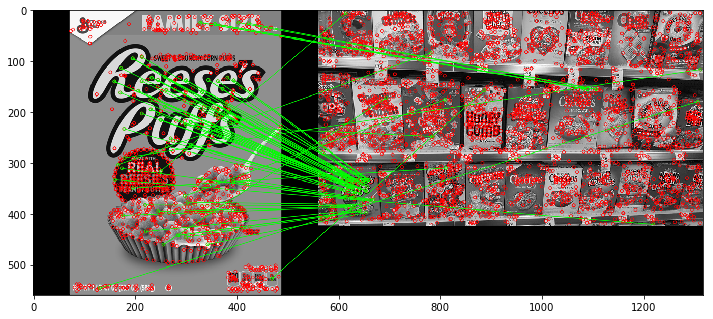

In [45]:
display(flann_matches)